In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [32]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
import random
from cmath import *

In [33]:
def get_random_state():
    theta = np.pi*random.random()
    phi = 2*np.pi*random.random()

    a = np.cos(theta/2)
    b = rect(1,phi)*np.sin(theta/2)
    
    return a, b, theta, phi

In [34]:
# Construct quantum circuit without measure
a0,b0, theta, phi = get_random_state()
print(a0,b0)

'''q = QuantumRegister(2, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc = QuantumCircuit(q, c0, c1)

# Create initial state by rotating by theta and phi
qc.u3(theta, phi, 0, q[0])

qc.cx(q[0], q[1])
qc.h(q[0])

qc.barrier(q)
qc.measure(q[0], c0[0])

#qc.barrier(q)
qc.z(q[1]).c_if(c0, 1)

qc.measure(q[1], c1[0])

qc.draw()'''

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q, c)

# Create initial state by rotating by theta and phi
qc.u3(theta, phi, 0, q[0])
################################
qc.cx(q[0], q[1])
qc.h(q[0])

qc.barrier(q)
qc.measure(q[0], c[0])

qc.z(q[1]).c_if(c, 1)

# final
qc.measure(q[1], c[1])
qc.draw()

# Execute and get counts
#result = execute(qc, simulator).result()
#statevector = result.get_statevector(qc)
#plot_state_city(statevector, title='Bell state')

0.8922058015335582 (-0.09019630020507659+0.44253071660527316j)


In [41]:
# Select the StatevectorSimulator from the Aer provider
import NoisyQuantumCircuit as NoisyQuantumCircuit
# Import the noise model object
from qiskit.providers.aer.noise import NoiseModel

# Import all standard errors
from qiskit.providers.aer.noise.errors import *  

# Import noise base clases
from qiskit.providers.aer.noise.errors.quantum_error import QuantumError
from qiskit.providers.aer.noise.errors.readout_error import ReadoutError

T1 = 12000  # nanoseconds
T2 = T1 * 2 # nanoseconds
Tau0 = 50   # nanoseconds    
pulseWidth = 1.25*Tau0

thermalError1bit = thermal_relaxation_error(T1, T2, pulseWidth)
thermalError2bit = thermal_relaxation_error(T1, T2, pulseWidth).kron(
                    thermal_relaxation_error(T1, T2, pulseWidth))


errors1Qubit = [thermalError1bit]
errors2Qubit = [thermalError2bit]


In [36]:
simulator = Aer.get_backend('qasm_simulator')

qNoisyCirc = NoisyQuantumCircuit.NoisyQuantumCircuit(qc, 2, errors1Qubit, errors2Qubit)
result = execute(qNoisyCirc.getQuantumCircuit(), simulator, shots=10000, 
                           basis_gates = qNoisyCirc.getNoiseModel().basis_gates,
                           noise_model = qNoisyCirc.getNoiseModel()).result()
data = result.get_counts()

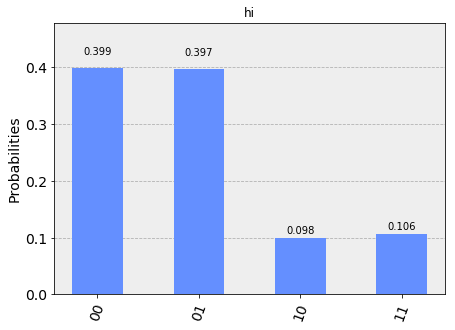

In [37]:
# data = teleport_result.get_counts(qc)
plot_histogram(data, title="hi")

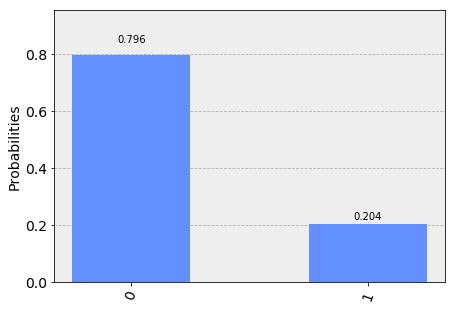

In [38]:
bob = {}
bob['0'] = data['00'] + data['01']
bob['1'] = data['10'] + data['11'] 
plot_histogram(bob)

In [39]:
a1 = np.sqrt(bob['0']/(bob['0']+bob['1']))
b1 = np.sqrt(bob['1']/(bob['0']+bob['1']))

print("Initial amp:",a0,b0)

mag_a0 = np.sqrt(a0*a0.conjugate()).real
mag_b0 = np.sqrt(b0*b0.conjugate()).real

print("Initial mag:", mag_a0, mag_b0)
print("Final amp:", a1, b1)

fidelity = ((mag_a0*a1) + (mag_b0*b1)).real

print(fidelity)

Initial amp: 0.8922058015335582 (-0.09019630020507659+0.44253071660527316j)
Initial mag: 0.8922058015335582 0.4516290598598156
Final amp: 0.8921883209278185 0.45166359162544856
0.9999999992509928
